In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

In [3]:
# Load in the data with `read_csv()`
crashes = pd.read_csv("crashes.sample2020.csv")
people = pd.read_csv("people.sample.csv")
vehicle = pd.read_csv("vehicles.sample.csv")

/opt/anaconda3/envs/vision_zero/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (21,40,41,42,44,48,49,50,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Basic Summary of Datasets
#print(crashes)
#print(people)
#print(vehicle)
crashes.info()
people.info()
vehicle.info()

crashes.head()
people.head()
vehicle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                33408 non-null  object 
 1   RD_NO                          33021 non-null  object 
 2   CRASH_DATE_EST_I               2337 non-null   object 
 3   CRASH_DATE                     33408 non-null  object 
 4   POSTED_SPEED_LIMIT             33408 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         33408 non-null  object 
 6   DEVICE_CONDITION               33408 non-null  object 
 7   WEATHER_CONDITION              33408 non-null  object 
 8   LIGHTING_CONDITION             33408 non-null  object 
 9   FIRST_CRASH_TYPE               33408 non-null  object 
 10  TRAFFICWAY_TYPE                33408 non-null  object 
 11  LANE_CNT                       10996 non-null  float64
 12  ALIGNMENT                      33408 non-null 

CRASH_UNIT_ID                                    CRASH_RECORD_ID     RD_NO  \
0         228894  2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...  JA453603   
1         228895  2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...  JA453603   
2         228896  2524b06fc6634bd349fc1d7f132c8362529473768f6ac2...  JA453603   
3         228905  f7210aec9ac43a7b36c30b49033adebcb3060b96580341...  JA453640   
4         228906  f7210aec9ac43a7b36c30b49033adebcb3060b96580341...  JA453640   

               CRASH_DATE  UNIT_NO   UNIT_TYPE  NUM_PASSENGERS  VEHICLE_ID  \
0  10/01/2017 02:20:00 AM        1      DRIVER             NaN    224185.0   
1  10/01/2017 02:20:00 AM        2      PARKED             NaN    224187.0   
2  10/01/2017 02:20:00 AM        3      PARKED             NaN    224191.0   
3  10/01/2017 02:41:00 AM        1      DRIVER             NaN    224199.0   
4  10/01/2017 02:41:00 AM        2  DRIVERLESS             NaN    224203.0   

  CMRC_VEH_I                  MAKE  ... TRAILER1_LENGTH TRAILER2_LENGTH  \
0        NaN                 DODGE  ...             NaN             NaN   
1        NaN  GENERAL MOTORS CORP.  ...             NaN             NaN   
2        NaN                SATURN  ...             NaN             NaN   
3        NaN                  FORD  ...             NaN             NaN   
4        NaN             CHEVROLET  ...             NaN             NaN   

   TOTAL_VEHICLE_LENGTH AXLE_CNT VEHICLE_CONFIG CARGO_BODY_TYPE LOAD_TYPE  \
0                   NaN      NaN            NaN             NaN       NaN   
1                   NaN      NaN            NaN             NaN       NaN   
2                   NaN      NaN            NaN             NaN       NaN   
3                   NaN      NaN            NaN             NaN       NaN   
4                   NaN      NaN            NaN             NaN       NaN   

  HAZMAT_OUT_OF_SERVICE_I MCS_OUT_OF_SERVICE_I HAZMAT_CLASS  
0                     NaN                  NaN          NaN  
1                     NaN                  NaN          NaN  
2                     NaN                  NaN          NaN  
3                     NaN                  NaN          NaN  
4                     NaN                  NaN          NaN  

[5 rows x 72 columns]

In [17]:
# Checking the missing values of crashes
crashes.isnull().sum()

CRASH_RECORD_ID                      0
RD_NO                              387
CRASH_DATE_EST_I                 31071
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         22412
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                        935
CRASH_TYPE                           0
INTERSECTION_RELATED_I           25515
NOT_RIGHT_OF_WAY_I               31825
HIT_AND_RUN_I                    23714
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION         

In [18]:
# Checking the missing values of people
people.isnull().sum()

PERSON_ID                    0
PERSON_TYPE                  0
CRASH_RECORD_ID              0
RD_NO                     8360
VEHICLE_ID                1743
CRASH_DATE                   0
SEAT_NO                  64835
CITY                     21186
STATE                    20300
ZIPCODE                  26461
SEX                       1273
AGE                      22795
DRIVERS_LICENSE_STATE    33455
DRIVERS_LICENSE_CLASS    40251
SAFETY_EQUIPMENT           257
AIRBAG_DEPLOYED           1675
EJECTION                  1094
INJURY_CLASSIFICATION       50
HOSPITAL                 65601
EMS_AGENCY               71763
EMS_RUN_NO               80362
DRIVER_ACTION            17380
DRIVER_VISION            17386
PHYSICAL_CONDITION       17321
PEDPEDAL_ACTION          80402
PEDPEDAL_VISIBILITY      80404
PEDPEDAL_LOCATION        80403
BAC_RESULT               17298
BAC_RESULT VALUE         81915
CELL_PHONE_USE           81984
dtype: int64

In [19]:
# Checking the missing values of vehicle
vehicle.isnull().sum()

CRASH_UNIT_ID                  0
CRASH_RECORD_ID                0
RD_NO                       8129
CRASH_DATE                     0
UNIT_NO                        0
                           ...  
CARGO_BODY_TYPE            74998
LOAD_TYPE                  75036
HAZMAT_OUT_OF_SERVICE_I    75053
MCS_OUT_OF_SERVICE_I       75035
HAZMAT_CLASS               75615
Length: 72, dtype: int64

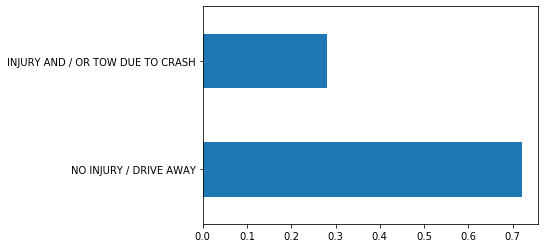

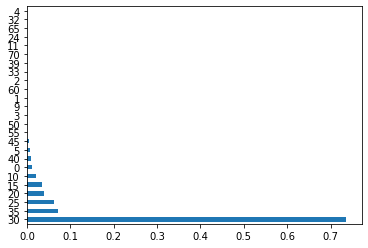

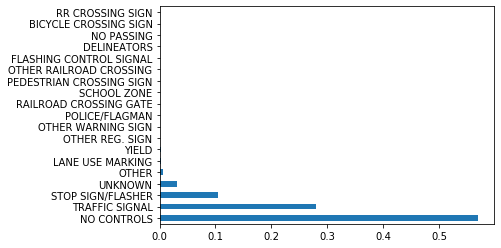

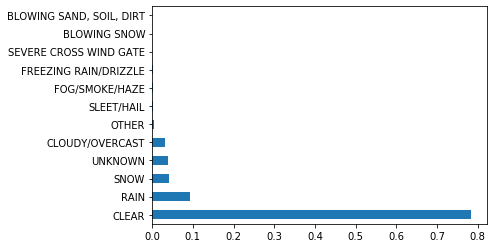

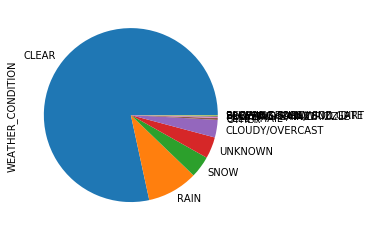

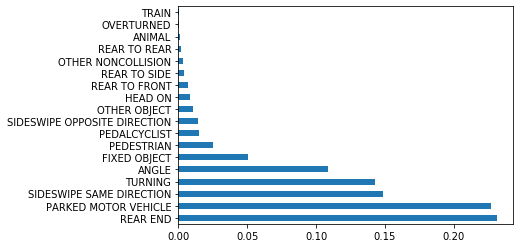

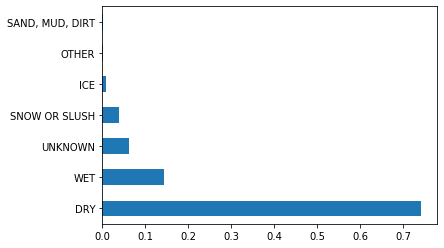

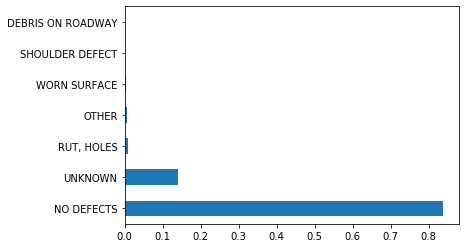

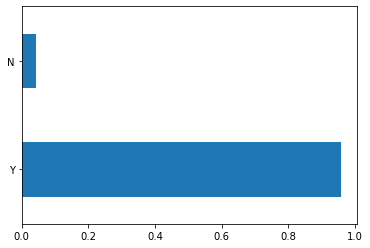

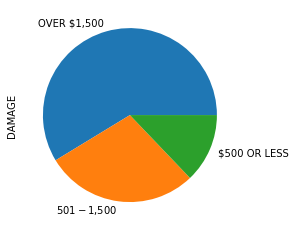

In [35]:
# EDA of crashes

#Crash type
crashes.CRASH_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.CRASH_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

#Speed Limit
crashes.POSTED_SPEED_LIMIT.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.POSTED_SPEED_LIMIT.value_counts(normalize = True).plot.barh()
plt.show()

#Traffic Control
crashes.TRAFFIC_CONTROL_DEVICE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.TRAFFIC_CONTROL_DEVICE.value_counts(normalize = True).plot.barh()
plt.show()

#Weather Condition
crashes.WEATHER_CONDITION.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.WEATHER_CONDITION.value_counts(normalize = True).plot.barh()
plt.show()

#Weather Condition
crashes.WEATHER_CONDITION.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.WEATHER_CONDITION.value_counts(normalize = True).plot.pie()
plt.show()

#Crash Type
crashes.FIRST_CRASH_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.FIRST_CRASH_TYPE.value_counts(normalize = True).plot.barh()
plt.show()

#Road Condition
crashes.ROADWAY_SURFACE_COND.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.ROADWAY_SURFACE_COND.value_counts(normalize = True).plot.barh()
plt.show()

#Road Defect
crashes.ROAD_DEFECT.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.ROAD_DEFECT.value_counts(normalize = True).plot.barh()
plt.show()

#Hit & Run
crashes.HIT_AND_RUN_I.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.HIT_AND_RUN_I.value_counts(normalize = True).plot.barh()
plt.show()

#Damage from crashes
crashes.DAMAGE.value_counts(normalize = True)

#plot the bar graph of percentage
crashes.DAMAGE.value_counts(normalize = True).plot.pie()
plt.show()

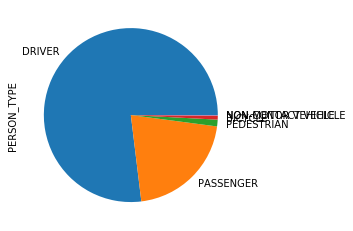

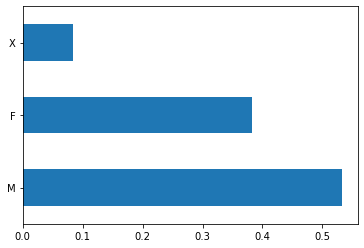

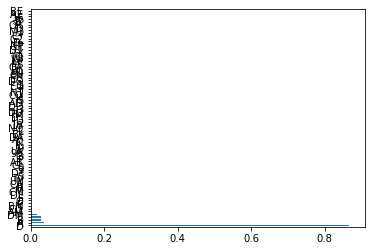

In [34]:
# EDA of people

#Person Type
people.PERSON_TYPE.value_counts(normalize = True)

#plot the bar graph of percentage
people.PERSON_TYPE.value_counts(normalize = True).plot.pie()
plt.show()

#Gender
people.SEX.value_counts(normalize = True)

#plot the bar graph of percentage
people.SEX.value_counts(normalize = True).plot.barh()
plt.show()

#Driving License, not relevant
people.DRIVERS_LICENSE_CLASS.value_counts(normalize = True)

#plot the bar graph of percentage
people.DRIVERS_LICENSE_CLASS.value_counts(normalize = True).plot.barh()
plt.show()

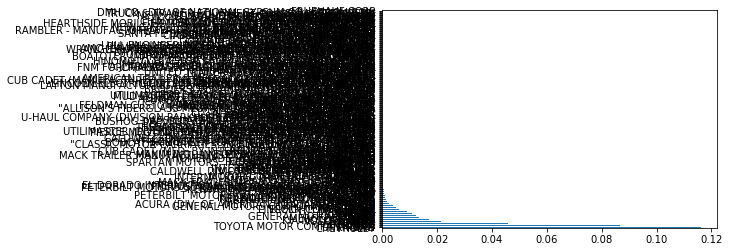

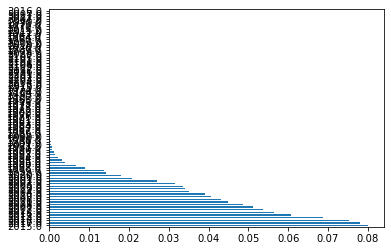

In [37]:
# EDA of vehicles

#Vehicle brand
vehicle.MAKE.value_counts(normalize = True)

#plot the bar graph of percentage
vehicle.MAKE.value_counts(normalize = True).plot.barh()
plt.show()

#Vehicle Year
vehicle.VEHICLE_YEAR.value_counts(normalize = True)

#plot the bar graph of percentage
vehicle.VEHICLE_YEAR.value_counts(normalize = True).plot.barh()
plt.show()

In [ ]:
#Find the correlation between features, both categorical and numerical
associations(crashes)
associations(people)
associations(vehicle)

In [6]:
# Remove missing value with more than 50% missing

# count() does not include NaN values

# For crashes
crashes2 = crashes[[column for column in crashes if crashes[column].count() / len(crashes) >= 0.5]]

print("List of dropped columns of crahes:", end = " ")
for c in crashes.columns:
    if c not in crashes2.columns:
        print(c, end = ", ")
print('\n')
crashes = crashes2

# For people
people2 = people[[column for column in people if people[column].count() / len(people) >= 0.5]]

print("List of dropped columns of people:", end = " ")
for c in people.columns:
    if c not in people2.columns:
        print(c, end = ", ")
print('\n')
people = people2

# For vehicle
vehicle2 = vehicle[[column for column in vehicle if vehicle[column].count() / len(vehicle) >= 0.5]]

print("List of dropped columns of vehicle:", end = " ")
for c in vehicle.columns:
    if c not in vehicle2.columns:
        print(c, end = ", ")
print('\n')
vehicle = vehicle2

crashes.info()
people.info()
vehicle.info()

List of dropped columns of crahes: CRASH_DATE_EST_I, LANE_CNT, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, 

List of dropped columns of people: SEAT_NO, HOSPITAL, EMS_AGENCY, EMS_RUN_NO, PEDPEDAL_ACTION, PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION, BAC_RESULT VALUE, CELL_PHONE_USE, 

List of dropped columns of vehicle: NUM_PASSENGERS, CMRC_VEH_I, TOWED_I, FIRE_I, EXCEED_SPEED_LIMIT_I, TOWED_BY, TOWED_TO, AREA_00_I, AREA_01_I, AREA_02_I, AREA_03_I, AREA_04_I, AREA_05_I, AREA_06_I, AREA_07_I, AREA_08_I, AREA_09_I, AREA_10_I, AREA_11_I, AREA_12_I, AREA_99_I, CMV_ID, USDOT_NO, CCMC_NO, ILCC_NO, COMMERCIAL_SRC, GVWR, CARRIER_NAME, CARRIER_STATE, CARRIER_CITY, HAZMAT_PLACARDS_I, HAZMAT_NAME, UN_NO, HAZMAT_PRESENT_I, HAZMAT_REPORT_I, HAZMAT_REPORT_NO, MCS_REPORT_I, MCS_REPORT_NO, HAZMAT_VIO_CAUSE_CRASH_I, MCS_VIO_CAUSE_CRASH_I, IDOT_PERMIT_NO, WIDE_LOAD_I, TRAILER1_WIDTH, TRAILER2_WIDTH, T

In [ ]:
# Check duplicate records

duplicate_crashes = crashes.duplicated()
duplicate_people = people.duplicated()
duplicate_vehicle = vehicle.duplicated()

print(duplicate_crashes.sum())
print(duplicate_people.sum())
print(duplicate_people.sum())


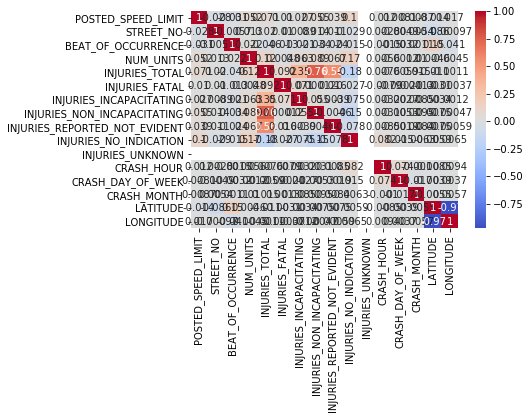

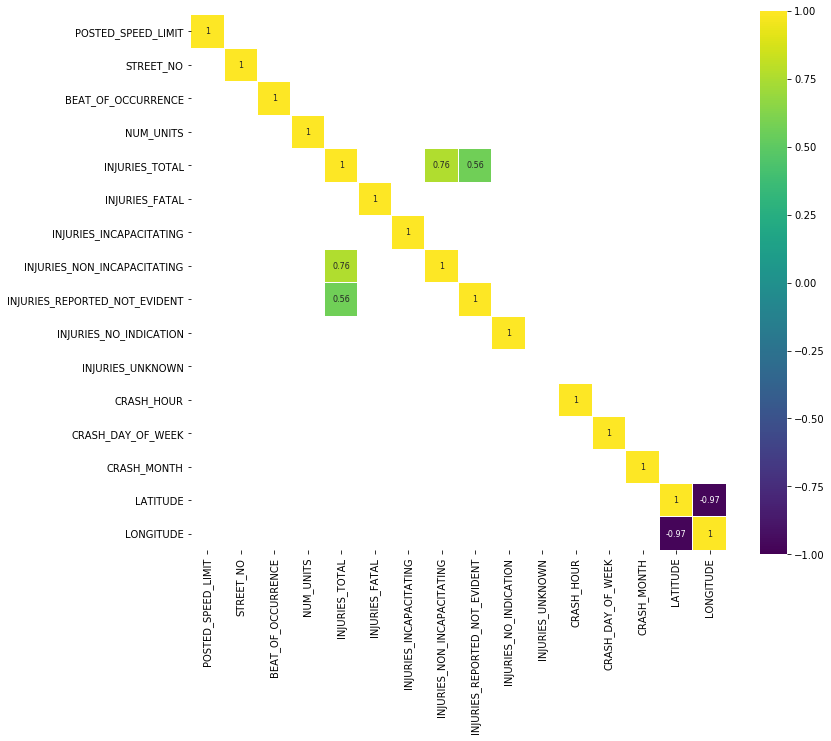

In [21]:
# Coorelation of Crahes data set
sns.heatmap(crashes.corr(method = "pearson"), annot = True, cmap = "coolwarm")



corr = crashes.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

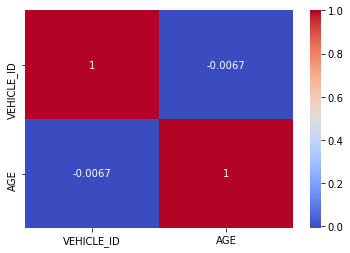

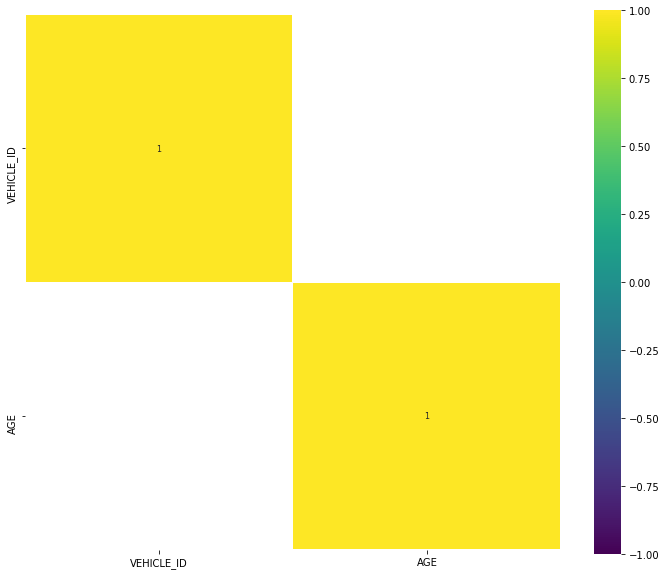

In [19]:
# Coorelation of People data set
sns.heatmap(people.corr(method = "pearson"), annot = True, cmap = "coolwarm")


corr = people.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

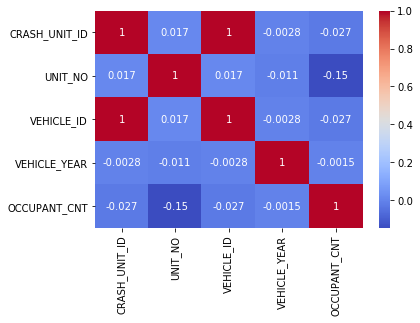

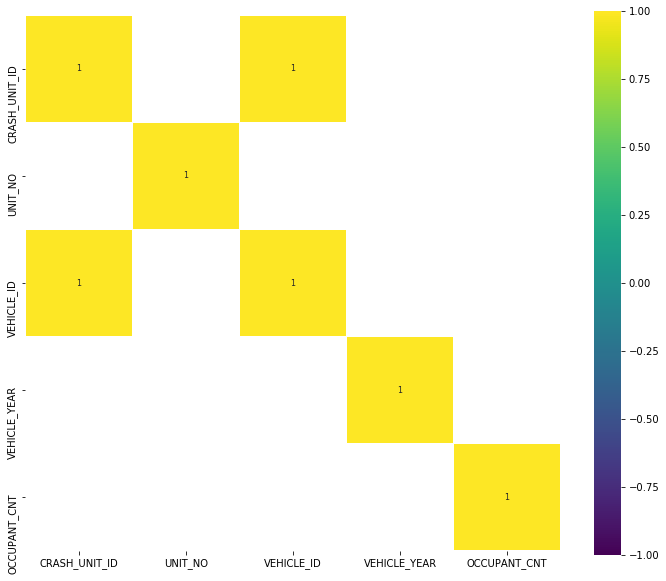

In [18]:
# Coorelation of vehicle data set
sns.heatmap(vehicle.corr(method = "pearson"), annot = True, cmap = "coolwarm")


corr = vehicle.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
fig, axes = plt.subplots(round(len(people.columns) / 3), 3, figsize = (12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(people.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 45)
        sns.countplot(x = people.columns[i], alpha = 0.7, data = people, ax = ax)

fig.tight_layout()

In [38]:
#References


#https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

#https://medium.com/analytics-vidhya/machine-learning-with-python-eda-cleaning-feature-engineering-and-ensemble-model-assessment-e09d7e1accb